In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from datetime import date, datetime
from modules import Reconstruction, Visualization, Utils, Network

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Define data set name and constraint type
# dataset_name = 'riderr.1.node'
# triangle_name = 'riderr.1.ele'
dataset_name = 'riderr.vert'
# current_date = date.today().strftime("%Y%m%d")
current_date = '20210517'
attempt = '3'
epoch = 000

print(datetime.now())

2021-05-19 06:04:31.138019


In [5]:
# Load points
filename = mp + '/dataset/2d/' + dataset_name
data = Utils.read_txt2(filename, k_distance=50, rescale=None, device=device)

# data = Utils.circle_dataset(k_distance=50, device=device)

# data = Utils.read_mesh2(filename, device=device)
# triangle_file = mp + '/dataset/2d/' + triangle_name
# triangles = Utils.read_triangle(triangle_file, device)

In [6]:
traineddata_path = mp + '/models/' + current_date + '_' + attempt + '.traineddata'
# traineddata_path = None
model, optimizer, scheduler = Network.load_model(traineddata_path, dimension=2, device=device)

Model loaded


Setting up
Loss values loaded

Training


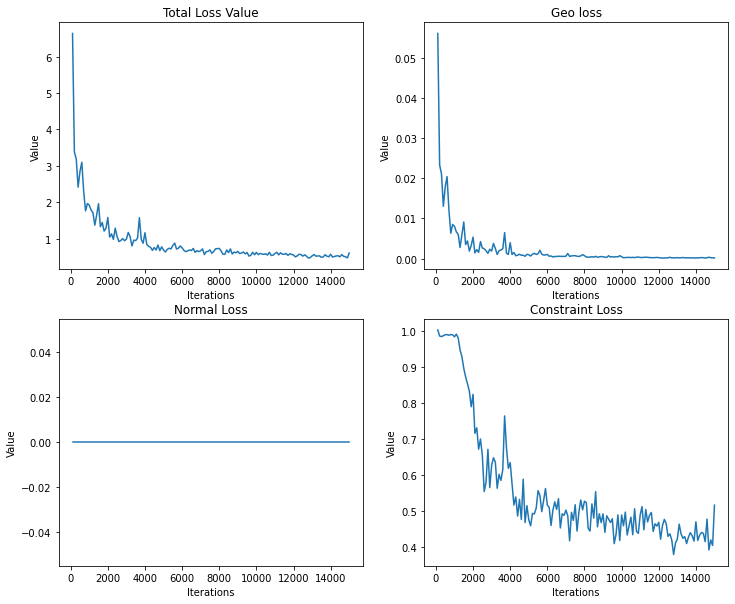

In [7]:
outfile = mp + '/figures/loss_value/' + current_date + '_' + attempt + '.npy'
# outfile = None
model, optimizer, scheduler = Reconstruction.train(epoch,
                             model,
                             optimizer,
                             scheduler,
                             data,
                            #  triangles,
                             batch_size=None,
                             loss_output_path=outfile,
                             device=device)

In [8]:
# attempt = '17'
# current_date = date.today().strftime("%Y%m%d")
# save_path = mp + '/models/' + current_date + '_' + attempt + '.traineddata'
# Network.save_model(save_path, model, optimizer, scheduler)

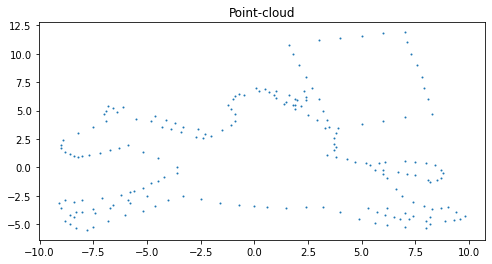

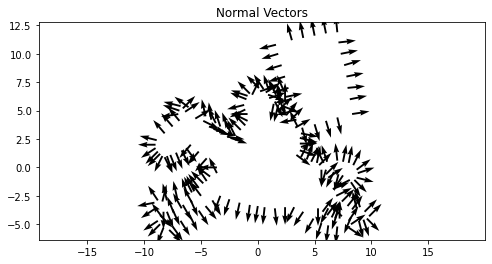

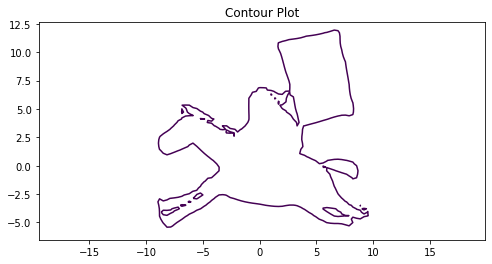

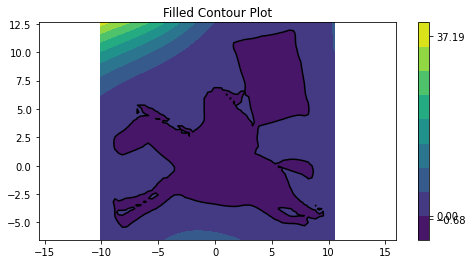

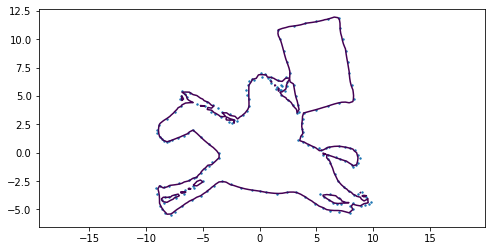

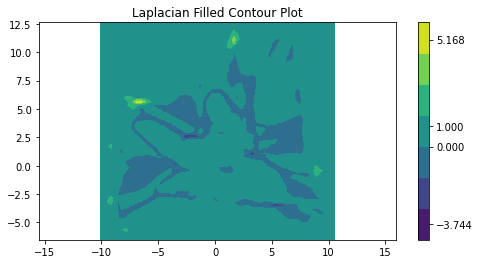

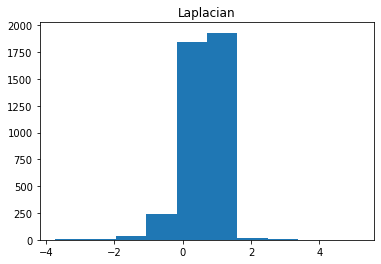

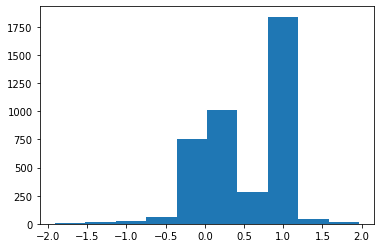

In [9]:
constraint_output_path = None
vtk_output_path = None
Visualization.visualize2(model, data, 
                         constraint_output_path=constraint_output_path, 
                         vtk_output_path=vtk_output_path,
                         scatter=True, vecfield=True, surface=True, filled_contour=True,
                         device=device)

# Visualization.trimesh_visualize2(model, data, triangles)

In [10]:
# # import torch

# # x = torch.tensor([[1.,2.], [2.,3.], [3.,4.]])

# import numpy as np

# x = np.array([[1,2,1],[3,4,0],[5,6,1]])
# print(x)
# print()
# # # print(x.mean(axis=0))
# # t = np.array([True, False, True])
# # t = np.array([1.,0,1])
# # t = x[:,2] != 0
# # print(t)
# # print(t)
# # A = np.array([[0.0, 1], [0.1, 2], [0.0, 3]])
# # y = np.split(A, np.where(A[:, 0]== 0.)[0][1:])
# # y = np.split(A, np.argwhere(A[:,0] == 0.0).flatten()[1:])
# # y = np.split(x, x[:,2].nonzero()[0])
# # y = x[~t]
# y = x[:,[0,-1]]
# # print(np.where(x[:, -1]== 1)[0][1:])
# print(y)
# # print(x[:,2].nonzero()[0])
# x = torch.tensor([[0],[1],[2]])
# print(x)
# print(x.flatten())
# x = torch.tensor([25.5])
# y = x.ceil()
# z = torch.tensor([30])
# torch.min(,30)